### Importing libraries

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Data Collection

In [217]:
data = pd.read_csv('https://raw.githubusercontent.com/WidhyaOrg/datasets/master/covid19.csv')
data = data.drop('Sno', axis = 1)

In [219]:
data.head()

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,30/01/20,Kerala,1,0,0,0
1,31/01/20,Kerala,1,0,0,0
2,01/02/20,Kerala,2,0,0,0
3,02/02/20,Kerala,3,0,0,0
4,03/02/20,Kerala,3,0,0,0


In [220]:
print(data.shape)

(270, 6)


In [221]:
data['Date'] =  pd.to_datetime(data['Date'], format = '%y%m%d', errors = 'ignore')

In [222]:
data

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,30/01/20,Kerala,1,0,0,0
1,31/01/20,Kerala,1,0,0,0
2,01/02/20,Kerala,2,0,0,0
3,02/02/20,Kerala,3,0,0,0
4,03/02/20,Kerala,3,0,0,0
...,...,...,...,...,...,...
265,21/03/20,Jammu and Kashmir,4,0,0,0
266,21/03/20,Ladakh,13,0,0,0
267,21/03/20,Uttar Pradesh,23,1,9,0
268,21/03/20,Uttarakhand,3,0,0,0


In [223]:
data.dtypes

Date                        object
State/UnionTerritory        object
ConfirmedIndianNational      int64
ConfirmedForeignNational     int64
Cured                        int64
Deaths                       int64
dtype: object

In [224]:
data['total'] = data['ConfirmedIndianNational']+data['ConfirmedForeignNational']+data['Cured']+data['Deaths']
grouped = data.groupby('Date', sort = False).sum()
grouped

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,total
Date,,,,,
30/01/20,1,0,0,0,1
31/01/20,1,0,0,0,1
01/02/20,2,0,0,0,2
02/02/20,3,0,0,0,3
03/02/20,3,0,0,0,3
04/02/20,3,0,0,0,3
05/02/20,3,0,0,0,3
06/02/20,3,0,0,0,3
07/02/20,3,0,0,0,3


#### From the above dataframe, we can infer that on 04/03/2020, total = 31

### Visualization

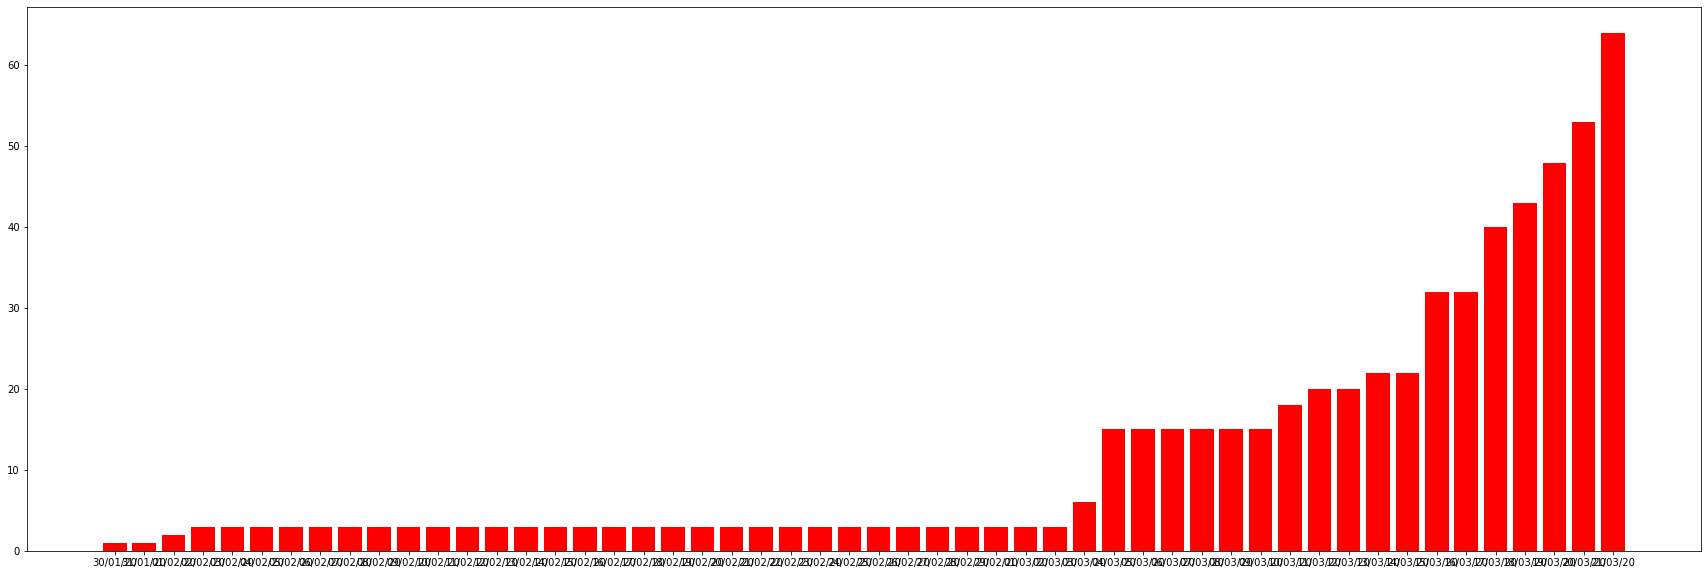

In [225]:
plt.figure(figsize = (30,10))
plt.bar(data['Date'], data['total'], color = 'red')
plt.show()

#### the plot shows exponential path

### Finding spread rate

In [196]:
rates = []
for j in grouped['total']:
    rates.append(((j+1)-(j))/j)

In [226]:
grouped['spread_rates'] = rates

In [227]:
grouped

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,total,spread_rates
Date,,,,,,
30/01/20,1,0,0,0,1,1.000000
31/01/20,1,0,0,0,1,1.000000
01/02/20,2,0,0,0,2,0.500000
02/02/20,3,0,0,0,3,0.333333
03/02/20,3,0,0,0,3,0.333333
04/02/20,3,0,0,0,3,0.333333
05/02/20,3,0,0,0,3,0.333333
06/02/20,3,0,0,0,3,0.333333
07/02/20,3,0,0,0,3,0.333333


### Modelling solution

#### Average spread_rate is 0.01506405

#### P_t = P_o*(e^(r*t))                         [function to depict the exponential trend]

#### where t is the time period in days, r is thr rate of increase (avg spread_rate) and P_t, P_o are predicted forecast and initial values respectively.

In [228]:
import math
r = 0.01506405
P_o = 31
t = 26
P_t = P_o*(math.exp(r*t))

In [230]:
print('forecast: ', P_t)
print('forecast: ', round(P_t, 0))

forecast:  45.862716233196544
forecast:  46.0
